<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase-1" data-toc-modified-id="Phase-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Phase 1</a></span></li><li><span><a href="#Placeholder" data-toc-modified-id="Placeholder-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Placeholder</a></span></li><li><span><a href="#New-Cost-Function" data-toc-modified-id="New-Cost-Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New Cost Function</a></span></li><li><span><a href="#Useful-Note" data-toc-modified-id="Useful-Note-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Useful Note</a></span></li></ul></div>

# Tensforlow Andrew Ng Tutorial

This notebook is based on the tutorial lecture from Andrew Ng's class on Coursera. I have added some comments and plots. 

The goal of this tutorial is to minimize cost function ` f(w) = (w-5)^2` using tensorflow.

https://www.coursera.org/learn/deep-neural-network/lecture/zcZlH/tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/ijung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Phase 1

Fine the minimum of the cost function where cost function looks like the plot below. As shown, 5 is the minimum. 

`w` is the variable we want to optimize

`cost` = w^2 + -10w + 25  or  = (w-5)^2

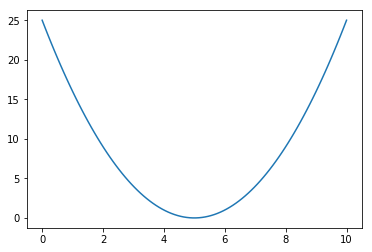

In [35]:
w = np.linspace(0, 10, 100)
plt.plot(w, (w**2 -10*w + 25)) 
# plt.plot(w, (w-5)**2) 
plt.show()

In [5]:
# init variable 
w = tf.Variable(0,dtype=tf.float32)

# define cost function 
cost = tf.add(tf.add(w**2,tf.multiply(-10.,w)),25)
# cost = w**2 - 10*w + 25 # also works 

# learning algorithm 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(w))

## 0 because we did not run anything yet 

0.0


In [6]:
# one step of Gradient Descent 
session.run(train)
print(session.run(w))

0.099999994


In [7]:
# run for 1000 iterations 
for i in range(1000): 
    session.run(train)
print(session.run(w))

# should be close to 5 

4.9999886


## Placeholder 



In [8]:
coefficients = np.array([[1.],[-10.],[25.]])

w = tf.Variable(0,dtype=tf.float32)
x = tf.placeholder(tf.float32,[3,1])
cost = x[0][0]*w**2 + x[1][0]*w + x[2][0]
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(w))

## 0 because we did not run anything yet 

0.0


In [9]:
# one step of Gradient Descent 
session.run(train,feed_dict={x:coefficients})
print(session.run(w))

0.099999994


In [10]:
# run for 1000 iterations 
for i in range(1000): 
    session.run(train,feed_dict={x:coefficients})
print(session.run(w))

# should be close to 5 

4.9999886


## New Cost Function

Change the input value and you get a different minimum. 

`Cost` =  (w-10)^2

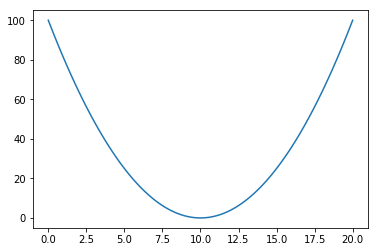

In [28]:
w = np.linspace(0, 20, 100)
plt.plot(w, (w**2 -20*w + 100)) 
plt.show()

In [14]:
coefficients = np.array([[1.],[-20.],[100.]])

w = tf.Variable(0,dtype=tf.float32)
x = tf.placeholder(tf.float32,[3,1])
cost = x[0][0]*w**2 + x[1][0]*w + x[2][0]
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(w))

0.0


In [15]:
# run for 1000 iterations 
for i in range(1000): 
    session.run(train,feed_dict={x:coefficients})
print(session.run(w))

# should be close to 10 

9.999977


## Useful Note

Two following codes are the same: 

Method 1 
```py
session = tf.Session()
session.run(init)
print(session.run(w))
```
Method 2
```py
with tf.Session as session:
    session.run(init)
    print(session.run(w))
```